# **Week 2 Tasks — Data Preparation, EDA, and Intro Modeling (Python)**

Use this template to complete Week 2 tasks. Replace placeholders with your work. Ensure the notebook runs top-to-bottom without errors. Add short captions/annotations below each plot and metric output.


In [ ]:
# Setup
import sys, warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
import kagglehub
import shutil 
from sklearn.linear_model import SGDRegressor
sns.set_theme(style='whitegrid')
%matplotlib inline
    

## **Task 1 — Load Data and Inspect**


### **Downloading Data**

In [22]:
# Download latest version
path = kagglehub.dataset_download("yashdevladdha/uber-ride-analytics-dashboard")

print("Path to dataset files:", path)
shutil.move(path, "uber-ride-analytics-dashboard")

100%|██████████| 16.5M/16.5M [00:06<00:00, 2.48MB/s]

Extracting files...


Path to dataset files: /home/dang.cpm/.cache/kagglehub/datasets/yashdevladdha/uber-ride-analytics-dashboard/versions/2


'uber-ride-analytics-dashboard/2'

Briefly describe the dataset, its purpose, and key variables.


### **Inspecting Data**

In [2]:
data = pd.read_csv("/home/dang.cpm/__MY_SPACE__/VinUni/Data-Science-Programming/Week_02/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
data.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

### **Describing the Data**

**Overview**
This comprehensive dataset contains detailed ride-sharing data from Uber operations for the year 2024.

The dataset contains 150,000 Uber ride bookings in the NCR region, with each row representing a single ride booking event.
Its purpose is to provide detailed analytics on ride bookings, cancellations, completions, and customer/driver interactions.

**Key variables:**
- `Date`, `Time`: When the booking was made.
- `Booking ID`, `Customer ID`: Unique identifiers for each booking and customer.
- `Booking Status`: Status of the ride (e.g., Completed, Incomplete, No Driver Found).
- `Vehicle Type`: Type of vehicle booked.
- `Pickup Location`, `Drop Location`: Start and end points of the ride.
- `Avg VTAT` (Vehicle Turnaround Time), `Avg CTAT` (Customer Turnaround Time): Operational metrics.
- `Cancelled Rides by Customer/Driver`, `Reason for cancelling by Customer/Driver`: Cancellations and their reasons.
- `Incomplete Rides`, `Incomplete Rides Reason`: Rides that were not completed and why.
- `Booking Value`: Fare amount for the ride.
- `Ride Distance`: Distance covered in the ride.
- `Driver Ratings`, `Customer Rating`: Feedback scores.
- `Payment Method`: How the ride was paid for (e.g., UPI, Debit Card).

**Purpose**
The primary purpose of this dataset is to enable in-depth analysis of Uber’s ride-hailing operations within the NCR region during 2024. By capturing every stage of the ride lifecycle, from booking to completion or cancellation, it provides a foundation for answering both operational and strategic questions. Therefore, this data can offer rich insights into booking patterns, vehicle performance, revenue streams, cancellation behaviors, and customer satisfaction metrics.

## **Task 2 — Data Types, Summary Stats, and Missingness**


### **Data Types**

In [7]:
# Convert 'Date' and 'Time' columns to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')

# Set category columns
category_cols = [
    'Booking ID', 'Customer ID', 'Booking Status', 'Vehicle Type',
    'Pickup Location', 'Drop Location', 'Reason for cancelling by Customer',
    'Driver Cancellation Reason', 'Incomplete Rides Reason', 'Payment Method'
]
for col in category_cols:
    if col in data.columns:
        data[col] = data[col].astype('category')

# Set object columns (for string/text columns that are not already category)
object_cols = [
    'Date', 'Time'
]
for col in object_cols:
    if col in data.columns and data[col].dtype != 'O':
        data[col] = data[col].astype('object')

# Set number columns
number_cols = [
    'Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance',
    'Driver Ratings', 'Customer Rating',
    'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides'
]
for col in number_cols:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

print("CATEGORY COLUMNS:")
print(data.select_dtypes(include='category').dtypes)
print("\nOBJECT COLUMNS:")
print(data.select_dtypes(include='object').dtypes)
print("\nNUMBER COLUMNS:")
print(data.select_dtypes(include='number').dtypes)

CATEGORY COLUMNS:
Booking ID                           category
Booking Status                       category
Customer ID                          category
Vehicle Type                         category
Pickup Location                      category
Drop Location                        category
Reason for cancelling by Customer    category
Driver Cancellation Reason           category
Incomplete Rides Reason              category
Payment Method                       category
dtype: object

OBJECT COLUMNS:
Date    object
Time    object
dtype: object

NUMBER COLUMNS:
Avg VTAT                       float64
Avg CTAT                       float64
Cancelled Rides by Customer    float64
Cancelled Rides by Driver      float64
Incomplete Rides               float64
Booking Value                  float64
Ride Distance                  float64
Driver Ratings                 float64
Customer Rating                float64
dtype: object


### **Summary Stats**

In [8]:
# Summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
display(data.describe())

# Summary statistics for categorical columns
print("\nSummary statistics for categorical columns:")
cat_cols_present = [col for col in data.select_dtypes(include=['category', 'object']).columns]
if cat_cols_present:
    display(data[cat_cols_present].describe())
else:
    print("No categorical columns found.")


Summary statistics for numeric columns:


,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000



Summary statistics for categorical columns:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,10500,27000,9000,102000
unique,365,62910,148767,5,148788,7,176,176,5,4,3,5
top,2024-11-16 00:00:00,2025-09-24 17:44:57,"""CNR7199036""",Completed,"""CID7828101""",Auto,Khandsa,Ashram,Wrong Address,Customer related issue,Customer Demand,UPI
freq,462,16,3,93000,3,37419,949,936,2362,6837,3040,45909


### **Missingness**

In [9]:
# Missingness
(data.isna().sum().to_frame('Total missing values').assign(pct=lambda s: s['Total missing values'] / len(data)))

,Total missing values,pct
Date,0,0.00
Time,0,0.00
Booking ID,0,0.00
Booking Status,0,0.00
Customer ID,0,0.00
Vehicle Type,0,0.00
Pickup Location,0,0.00
Drop Location,0,0.00
Avg VTAT,10500,0.07
Avg CTAT,48000,0.32


## **Task 3 — Data Cleaning**


### **Handle Missing Values and Remove Clear Duplicates** 

In [10]:
# Remove duplicate rows
data = data.drop_duplicates()

# Handle missing values
# For numeric columns: fill with median
num_cols = data.select_dtypes(include='number').columns
data[num_cols] = data[num_cols].apply(lambda col: col.fillna(col.median()))

# For categorical columns: fill with mode, or 'Unknown' if no mode exists
cat_cols = data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    mode = data[col].mode(dropna=True)
    if not mode.empty:
        data[col] = data[col].fillna(mode[0])
    else:
        data[col] = data[col].fillna('Unknown')

print(f"\nDuplicate rows: {data.duplicated().sum()}")
print(f"\nMissing values:")
(data.isna().sum().to_frame('Total missing values').assign(pct=lambda s: s['Total missing values'] / len(data)))




Duplicate rows: 0

Missing values:


,Total missing values,pct
Date,0,0.0
Time,0,0.0
Booking ID,0,0.0
Booking Status,0,0.0
Customer ID,0,0.0
Vehicle Type,0,0.0
Pickup Location,0,0.0
Drop Location,0,0.0
Avg VTAT,0,0.0
Avg CTAT,0,0.0


### **Standardize column names (snake_case) and fix inconsistent categorical labels if present.**

In [11]:
# Standardize column names to snake_case
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(r'[ \-]+', '_', regex=True)
    .str.replace(r'__+', '_', regex=True)
    .str.replace(r'[^a-z0-9_]', '', regex=True)
)

# Standardize all object and category columns: strip and title-case (but keep NaN as NaN)
for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col] = data[col].apply(lambda x: x.strip().title() if isinstance(x, str) else x)


### **Document**

Data Cleaning Decisions:
- Removed duplicate rows to ensure each record is unique and avoid data leakage or bias.
- Filled missing values:
    - For numeric columns, used the median to minimize the effect of outliers.
    - For categorical columns, used the mode (most frequent value); if no mode exists, filled with 'Unknown'.
- Standardized column names to snake_case for consistency and easier referencing in code.
- Standardized all object and category columns by stripping whitespace and applying title case to ensure consistent categorical labels (while preserving NaN values).


## **Task 4 — Exploratory Data Analysis (EDA)**


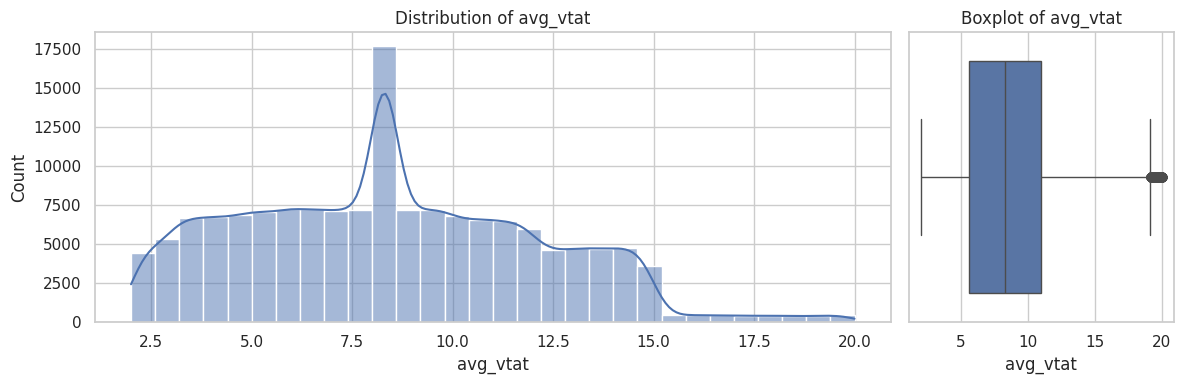

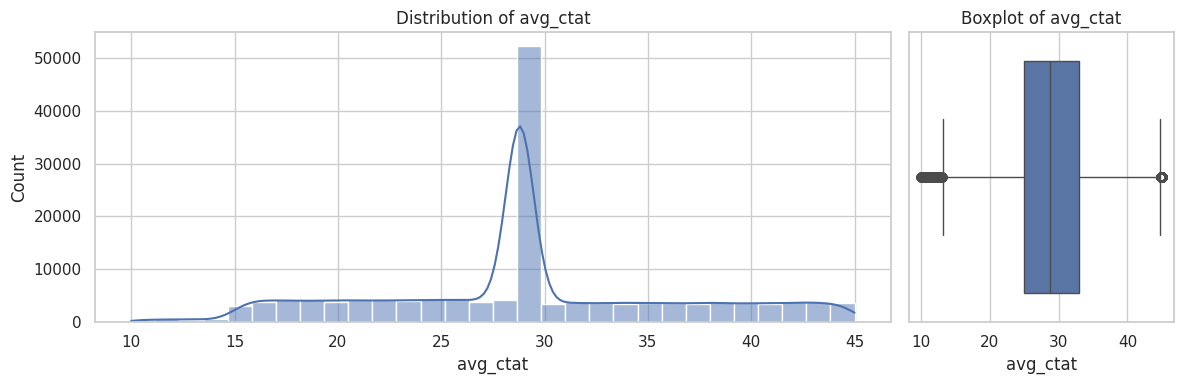

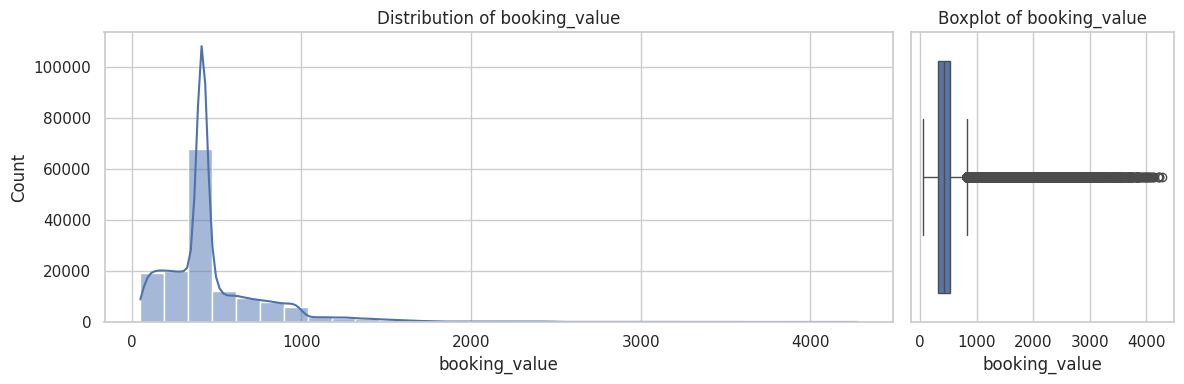

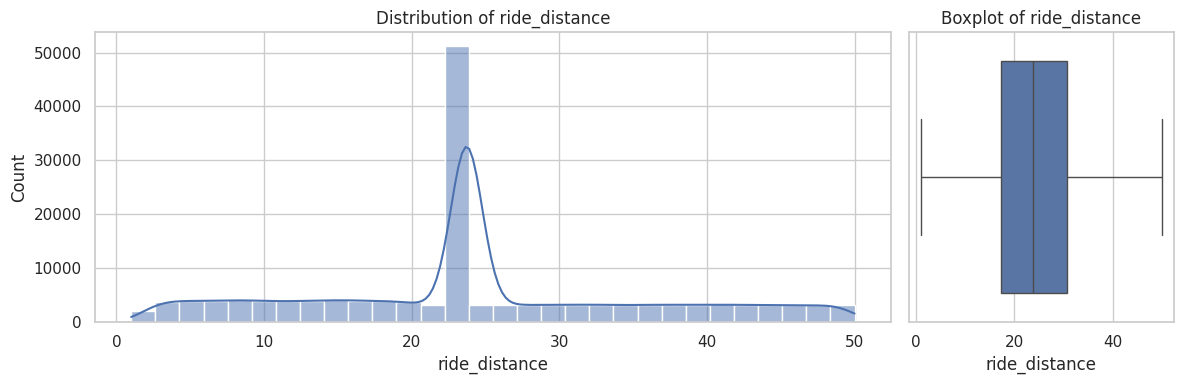

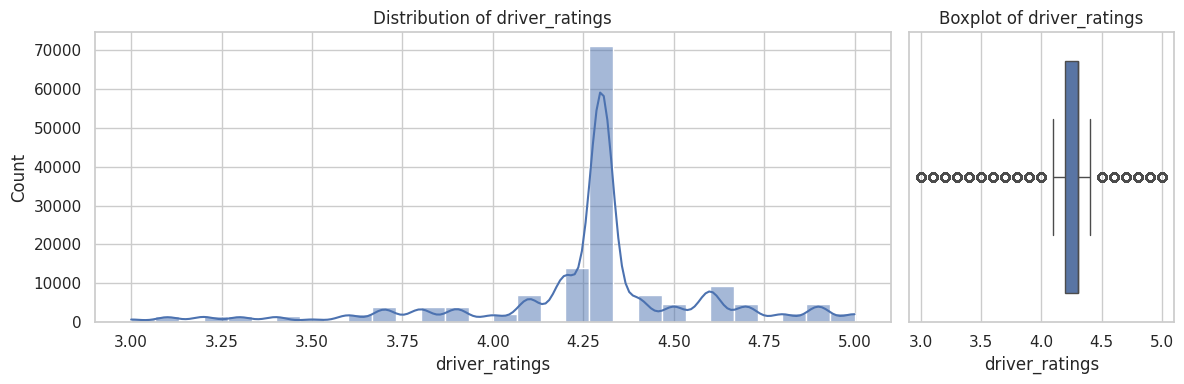

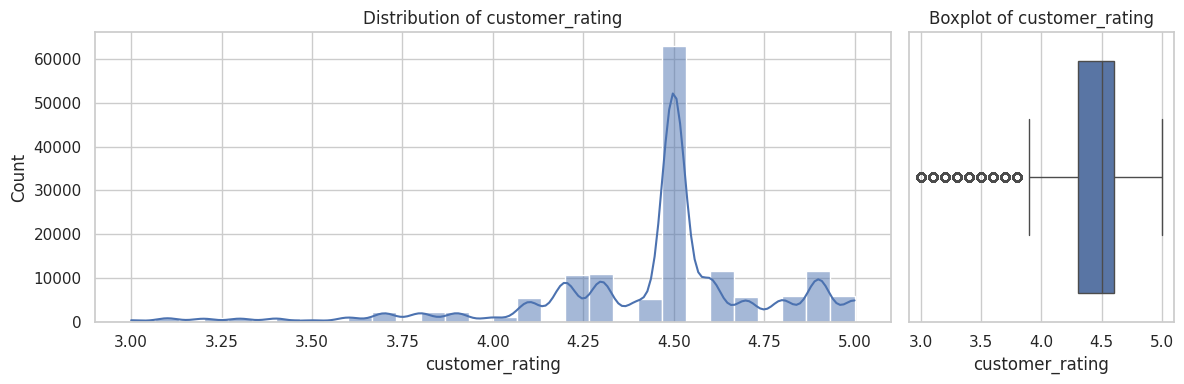

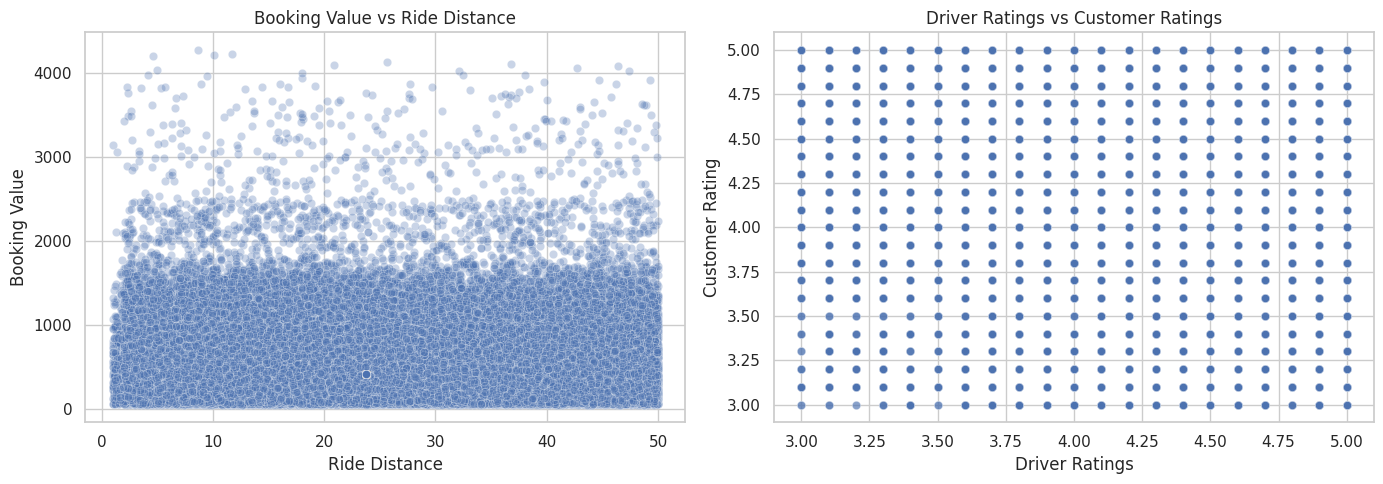

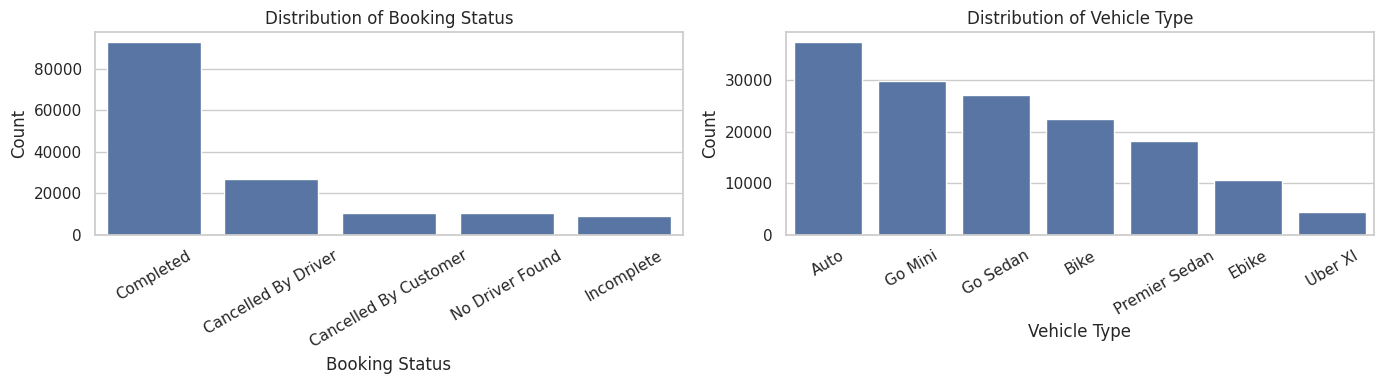

In [12]:
# Univariate distributions and outlier detection for key numeric variables
numeric_cols = ['avg_vtat', 'avg_ctat', 'booking_value', 'ride_distance', 'driver_ratings', 'customer_rating']

# Plot histogram and boxplot side by side for each numeric column
import math

for col in numeric_cols:
    if col in data.columns:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [3, 1]})
        # Histogram
        sns.histplot(data[col].dropna(), bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f'Distribution of {col}')
        axes[0].set_xlabel(col)
        # Boxplot
        sns.boxplot(x=data[col], ax=axes[1], orient='h')
        axes[1].set_title(f'Boxplot of {col}')
        axes[1].set_xlabel(col)
        plt.tight_layout()
        plt.show()

# Examine relationships among important variables
# 1. Booking Value vs Ride Distance and 2. Driver Ratings vs Customer Ratings side by side
pair_plots = []
if 'booking_value' in data.columns and 'ride_distance' in data.columns:
    pair_plots.append(('ride_distance', 'booking_value', 'Booking Value vs Ride Distance', 'Ride Distance', 'Booking Value'))
if 'driver_ratings' in data.columns and 'customer_rating' in data.columns:
    pair_plots.append(('driver_ratings', 'customer_rating', 'Driver Ratings vs Customer Ratings', 'Driver Ratings', 'Customer Rating'))

if pair_plots:
    fig, axes = plt.subplots(1, len(pair_plots), figsize=(7 * len(pair_plots), 5))
    if len(pair_plots) == 1:
        axes = [axes]
    for ax, (x, y, title, xlabel, ylabel) in zip(axes, pair_plots):
        sns.scatterplot(data=data, x=x, y=y, alpha=0.3, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# 3. Booking Status distribution and 4. Vehicle Type distribution side by side
cat_plots = []
if 'booking_status' in data.columns:
    cat_plots.append(('booking_status', 'Distribution of Booking Status', 'Booking Status'))
if 'vehicle_type' in data.columns:
    cat_plots.append(('vehicle_type', 'Distribution of Vehicle Type', 'Vehicle Type'))

if cat_plots:
    fig, axes = plt.subplots(1, len(cat_plots), figsize=(7 * len(cat_plots), 4))
    if len(cat_plots) == 1:
        axes = [axes]
    for ax, (col, title, xlabel) in zip(axes, cat_plots):
        sns.countplot(data=data, x=col, order=data[col].value_counts().index, ax=ax)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=30)
    plt.tight_layout()
    plt.show()


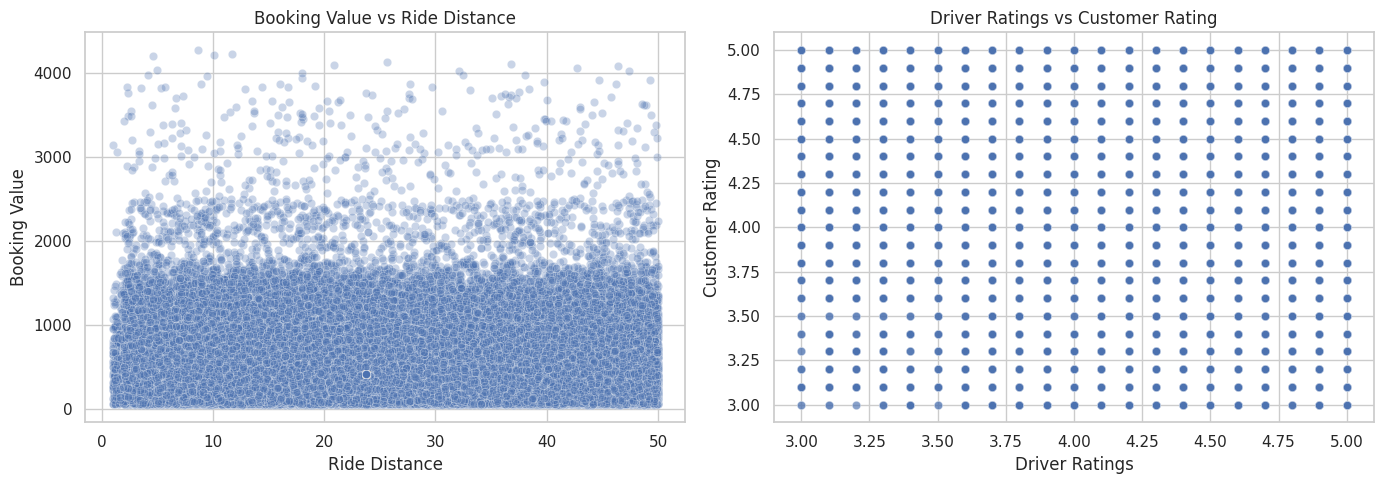

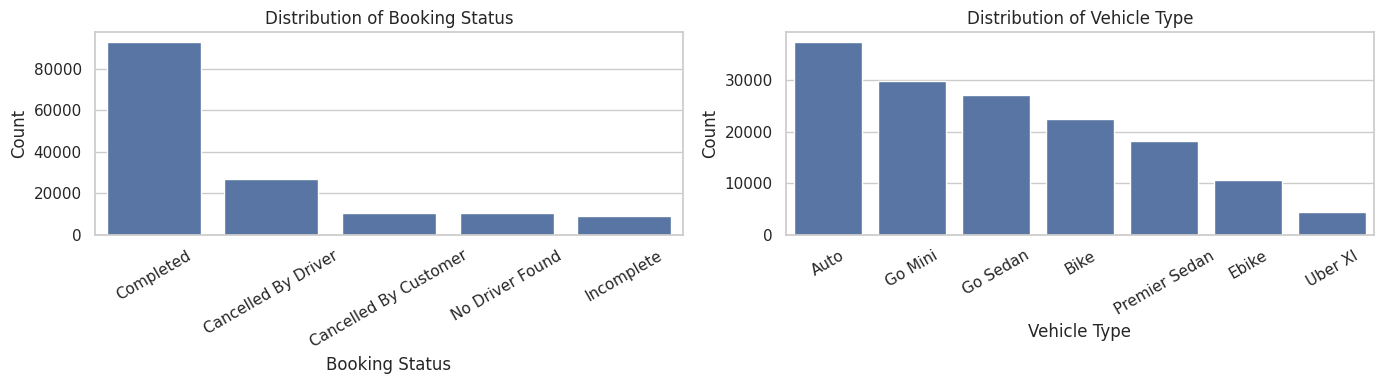

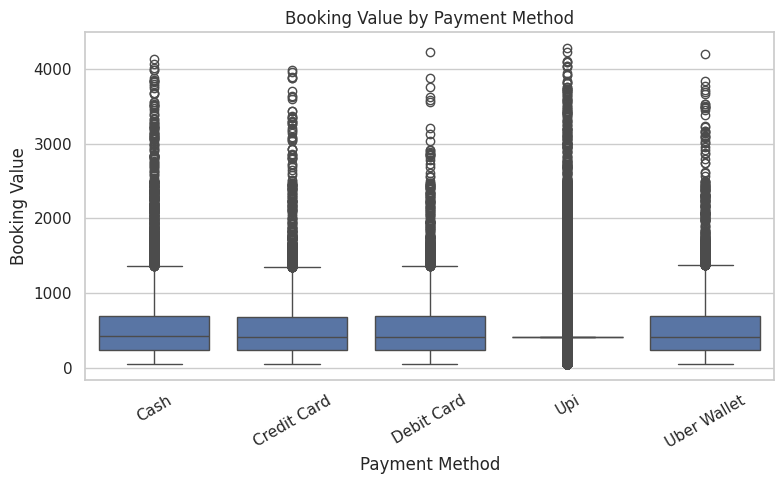

In [ ]:
# --- Scatter plots: booking_value vs ride_distance AND driver_ratings vs customer_rating side by side ---

# 1 & 2. Scatter plots for booking_value vs ride_distance and driver_ratings vs customer_rating
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: booking_value vs ride_distance
# This plot visualizes the relationship between the distance of a ride and its booking value (fare).
sns.scatterplot(
    data=data,
    x='ride_distance',      # Corrected column name
    y='booking_value',      # Corrected column name
    alpha=0.3,
    ax=axes[0]
)
axes[0].set_title('Booking Value vs Ride Distance')
axes[0].set_xlabel('Ride Distance')
axes[0].set_ylabel('Booking Value')

# Scatter plot: driver_ratings vs customer_rating
# This plot visualizes the correlation between driver ratings and customer ratings.
sns.scatterplot(
    data=data,
    x='driver_ratings',     # Corrected column name
    y='customer_rating',    # Corrected column name
    alpha=0.3,
    ax=axes[1]
)
axes[1].set_title('Driver Ratings vs Customer Rating')
axes[1].set_xlabel('Driver Ratings')
axes[1].set_ylabel('Customer Rating')

plt.tight_layout()
plt.show()

# --- Count plots: booking_status distribution AND vehicle_type distribution side by side ---

# 3 & 4. Count plots for booking_status and vehicle_type
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Count plot: booking_status distribution
# This plot shows the frequency of each booking status (e.g., completed, cancelled).
sns.countplot(
    data=data,
    x='booking_status',     # Corrected column name
    order=data['booking_status'].value_counts().index,
    ax=axes[0]
)
axes[0].set_title('Distribution of Booking Status')
axes[0].set_xlabel('Booking Status')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=30)

# Count plot: vehicle_type distribution
# This plot shows the frequency of each vehicle type used in bookings.
sns.countplot(
    data=data,
    x='vehicle_type',       # Corrected column name
    order=data['vehicle_type'].value_counts().index,
    ax=axes[1]
)
axes[1].set_title('Distribution of Vehicle Type')
axes[1].set_xlabel('Vehicle Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# --- Boxplot: booking_value by payment_method ---

# This boxplot shows the distribution of booking values for each payment method.
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    x='payment_method',     # Corrected column name
    y='booking_value'       # Corrected column name
)
plt.title('Booking Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Booking Value')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


### **Observations**

- **Customer Satisfaction:** The majority of customers provide an average driver rating of 4.5 stars, reflecting a consistently high level of satisfaction with ride experiences.

- **Payment Behavior:** UPI transactions are predominantly associated with lower-value rides, although occasional high-value transactions also occur, highlighting its versatility across ride categories.

- **Cancellations:** Driver-initiated cancellations (~25,000) significantly exceed customer-initiated cancellations (~10,000). This points to supply-side challenges such as inadequate incentives, route mismatches, or operational constraints (e.g., traffic conditions).

- **Pricing Dynamics:** Booking values exhibit high variability even at comparable ride distances, suggesting that fare determination is influenced by multiple factors beyond distance alone, including vehicle type, surge pricing, and demand-supply dynamics.
## **Task 5 — Data Visualization**


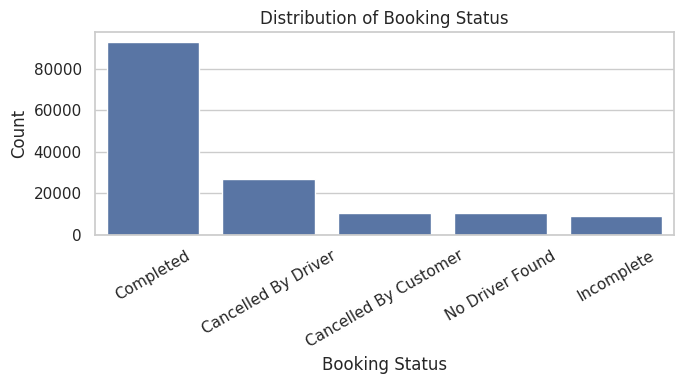

Key takeaway: Driver-initiated cancellations (~25,000) significantly exceed customer-initiated cancellations (~10,000). This points to supply-side challenges such as inadequate incentives, route mismatches, or operational constraints (e.g., traffic conditions).


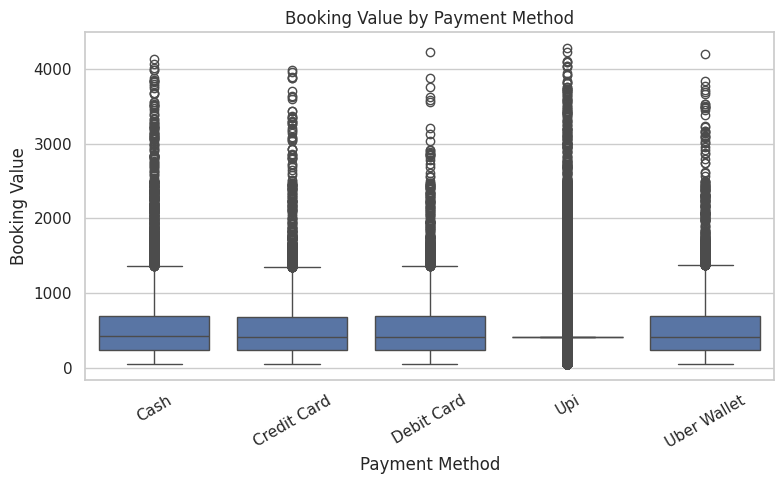

Key takeaway: UPI transactions are predominantly associated with lower-value rides, although occasional high-value transactions also occur, highlighting its versatility across ride categories.


In [19]:
# Visualize Booking Status and Payment Method distributions

# --- Plot 1: Booking Status distribution ---
# This plot shows the distribution of different booking statuses in the dataset.
plt.figure(figsize=(7, 4))
# Use the correct column name 'booking_status' (all lowercase, with underscores)
sns.countplot(
    data=data,
    x='booking_status',
    order=data['booking_status'].value_counts().index  # Order by frequency
)
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
# Key takeaway:
print("Key takeaway: Driver-initiated cancellations (~25,000) significantly exceed customer-initiated cancellations (~10,000). This points to supply-side challenges such as inadequate incentives, route mismatches, or operational constraints (e.g., traffic conditions).")

# --- Plot 2: Booking Value by Payment Method ---
# This boxplot shows the distribution of booking values for each payment method.
plt.figure(figsize=(8, 5))
# Use the correct column names: 'payment_method' and 'booking_value'
sns.boxplot(
    data=data,
    x='payment_method',
    y='booking_value'
)
plt.title('Booking Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Booking Value')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
# Key takeaway:
print("Key takeaway: UPI transactions are predominantly associated with lower-value rides, although occasional high-value transactions also occur, highlighting its versatility across ride categories.")

## **Task 6 — Class Imbalance (if applicable)**


## **Task 7 — Feature Engineering**


In [20]:
# Feature engineering: Adjust column names to match the provided list (all lowercase, underscores instead of spaces)
# The columns are:
# 'date', 'time', 'booking_id', 'booking_status', 'customer_id',
# 'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat',
# 'avg_ctat', 'cancelled_rides_by_customer',
# 'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver',
# 'driver_cancellation_reason', 'incomplete_rides',
# 'incomplete_rides_reason', 'booking_value', 'ride_distance',
# 'driver_ratings', 'customer_rating', 'payment_method'

# Define the main features (components) and target using the correct column names
components = [
    'avg_ctat',          # Average Customer to Arrival Time
    'avg_vtat',          # Average Vehicle to Arrival Time
    'customer_rating',   # Customer's rating
    'booking_value',     # Value of the booking
    'driver_ratings'     # Driver's rating
]
target = 'ride_distance'  # Target variable for modeling

# One-hot encode 'vehicle_type' and 'incomplete_rides_reason' using the correct column names
vehicle_type_dummies = pd.get_dummies(data['vehicle_type'], prefix='vehicle_type')
incomplete_reason_dummies = pd.get_dummies(data['incomplete_rides_reason'], prefix='incomplete_reason')

# Concatenate the one-hot encoded columns to the original data
data_encoded = pd.concat([data, vehicle_type_dummies, incomplete_reason_dummies], axis=1)

# Update components to include the new one-hot columns
components_extended = components + list(vehicle_type_dummies.columns) + list(incomplete_reason_dummies.columns)

# Print out the new feature columns for verification
print("One-hot encoded Vehicle Type columns:", list(vehicle_type_dummies.columns))
print("One-hot encoded Incomplete Rides Reason columns:", list(incomplete_reason_dummies.columns))
print("Final feature set for modeling:", components_extended)


One-hot encoded Vehicle Type columns: ['vehicle_type_Auto', 'vehicle_type_Bike', 'vehicle_type_Go Mini', 'vehicle_type_Go Sedan', 'vehicle_type_Premier Sedan', 'vehicle_type_Uber Xl', 'vehicle_type_Ebike']
One-hot encoded Incomplete Rides Reason columns: ['incomplete_reason_Customer Demand', 'incomplete_reason_Other Issue', 'incomplete_reason_Vehicle Breakdown']
Final feature set for modeling: ['avg_ctat', 'avg_vtat', 'customer_rating', 'booking_value', 'driver_ratings', 'vehicle_type_Auto', 'vehicle_type_Bike', 'vehicle_type_Go Mini', 'vehicle_type_Go Sedan', 'vehicle_type_Premier Sedan', 'vehicle_type_Uber Xl', 'vehicle_type_Ebike', 'incomplete_reason_Customer Demand', 'incomplete_reason_Other Issue', 'incomplete_reason_Vehicle Breakdown']


In [ ]:
# Create a correlation table between the components and the target
# Select only the relevant columns (features + target)
corr_columns = components + [target]
corr_df = data_encoded[corr_columns]

# Compute the correlation matrix
correlation_matrix = corr_df.corr()

# Display the correlation of each component with the target
relation_table = correlation_matrix[[target]].loc[components]
print("Correlation between each component and the target ('Booking Value'):")
print(relation_table)

# Optionally, display as a markdown table for better readability in notebooks
try:
    from IPython.display import display, Markdown
    display(Markdown("### Correlation Table (components vs. target)\n" + relation_table.to_markdown()))
except:
    pass


Correlation between each component and the target ('Booking Value'):
                 ride_distance
avg_ctat              0.102230
avg_vtat              0.050676
customer_rating      -0.020174
booking_value         0.010069
driver_ratings       -0.019510


### Correlation Table (components vs. target)
|                 |   ride_distance |
|:----------------|----------------:|
| avg_ctat        |       0.10223   |
| avg_vtat        |       0.0506761 |
| customer_rating |      -0.0201742 |
| booking_value   |       0.0100688 |
| driver_ratings  |      -0.0195098 |

## **Task 8 — Baseline Modeling**


Model Performance Comparison:
               Model       RMSE        R2
0  Linear Regression  11.192039  0.061727
1   Ridge Regression  11.192039  0.061727
2   Lasso Regression  11.206360  0.059324
3      Random Forest   4.204300  0.867597
4            XGBoost  10.855187  0.117356


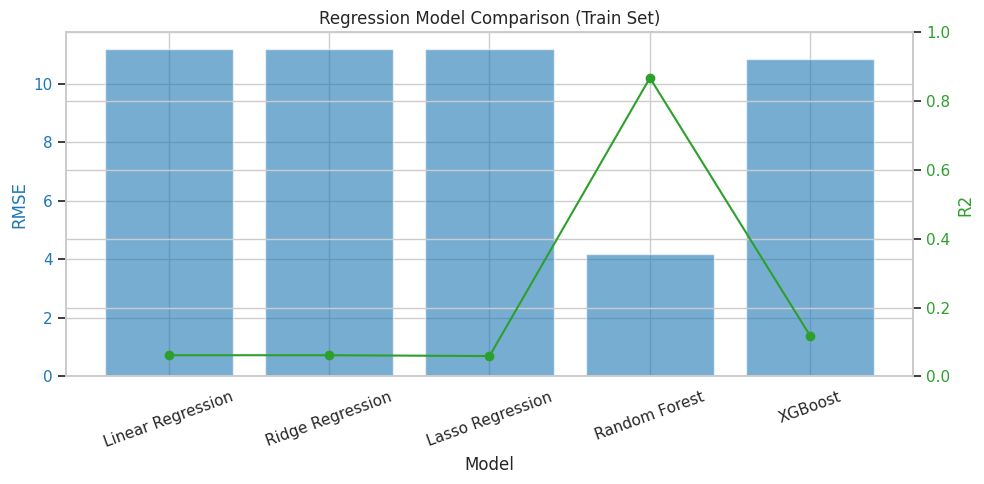

In [22]:
# Prepare features and target
X = data_encoded[components_extended].fillna(0).values
y = data_encoded[target].fillna(0).values

from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.1, random_state=42, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42, verbosity=0)
}

results = []

for name, model in models.items():
    model.fit(X, y)
    preds = model.predict(X)
    # Compute RMSE (handle squared argument for compatibility)
    try:
        rmse = mean_squared_error(y, preds, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y, preds))
    r2 = r2_score(y, preds)
    results.append({"Model": name, "RMSE": rmse, "R2": r2})

# Convert results to DataFrame for easy plotting
results_df = pd.DataFrame(results)

print("Model Performance Comparison:")
print(results_df)

# Visualize the results
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Model')
ax1.set_ylabel('RMSE', color=color)
ax1.bar(results_df['Model'], results_df['RMSE'], color=color, alpha=0.6, label='RMSE')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(results_df['Model'], rotation=20)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('R2', color=color)
ax2.plot(results_df['Model'], results_df['R2'], color=color, marker='o', label='R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1)

plt.title('Regression Model Comparison (Train Set)')
fig.tight_layout()
plt.show()


## Task 9 — Evaluation


In [ ]:
# Evaluate regression metrics on the training data for all models
from sklearn.metrics import mean_absolute_error

metrics = []
for name, model in models.items():
    preds = model.predict(X)
    try:
        rmse = mean_squared_error(y, preds, squared=False)
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y, preds))
    mae = mean_absolute_error(y, preds)
    r2 = r2_score(y, preds)
    metrics.append({"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2})

metrics_df = pd.DataFrame(metrics)
print("Regression Model Evaluation (Train Set):")
print(metrics_df.round(4))


Regression Model Evaluation (Train Set):
               Model     RMSE     MAE      R2
0  Linear Regression  11.1920  8.2468  0.0617
1   Ridge Regression  11.1920  8.2467  0.0617
2   Lasso Regression  11.2064  8.2387  0.0593
3      Random Forest   4.2043  2.8990  0.8676
4            XGBoost  10.8552  7.6356  0.1174

Interpretation:
The table above summarizes the RMSE, MAE, and R^2 scores for each regression model on the training data. Lower RMSE and MAE values indicate better fit, while R^2 closer to 1 suggests stronger predictive power. These results provide a baseline for model performance, but further validation on unseen data is needed to assess generalization.


Provide a 2–4 sentence interpretation of the metrics and what they imply.


**INTERPRETATION**

- The regression results show that the Random Forest model performs substantially better than the linear models (Linear, Ridge, and Lasso Regression) and XGBoost on the training set.
- Random Forest achieves the lowest RMSE (4.20) and MAE (2.90), along with a high R² value of 0.87, indicating it explains most of the variance in the target variable and fits the data well. 
- In contrast, the linear models and XGBoost have much higher errors (RMSE ≈ 11) and low R² values (0.06–0.12), suggesting they capture little of the underlying patterns. This implies that non-linear relationships are important in the data, and ensemble methods like Random Forest are more effective for this problem.


## **Task 10 — Findings and Next Steps**


Summarize 3–5 insights from EDA and modeling. Propose 2 concrete next steps to improve the analysis or model.


### **Key Insights from EDA and Modeling**

1. **High Customer Satisfaction**  
   Customers generally rate drivers very positively (≈4.5 stars), reflecting consistently strong ride experiences.  

2. **UPI Usage Skews Toward Small Rides**  
   UPI is the dominant payment method for lower-value rides, but it still accommodates occasional higher-value transactions, showing versatility.  

3. **Driver Cancellations Are a Major Issue**  
   Driver-initiated cancellations (~25k) more than double customer-initiated cancellations (~10k), pointing to supply-side inefficiencies such as route mismatches, incentives, or traffic constraints.  

4. **Modeling Results**  
   Random Forest substantially outperforms linear models and XGBoost, achieving the lowest RMSE (4.20), lowest MAE (2.90), and highest R² (0.87). This highlights the importance of non-linear relationships in the data, which ensemble methods capture effectively.  

---

### **Next Steps**

1. **Feature Engineering & Data Enrichment**  
   Add features related to demand-supply dynamics (e.g., time-of-day, traffic conditions, driver availability, surge multipliers) to improve predictive accuracy.  

2. **Model Exploration & Optimization**  
   Evaluate advanced ensemble methods (e.g., LightGBM, CatBoost) with hyperparameter tuning to potentially surpass Random Forest while maintaining computational efficiency.  
